# Fake News Detection with Hugging Face

Hugging Face is an open-source and platform provider of machine learning technologies. You can use install their package to access some interesting pre-built models to use them directly or to fine-tune (retrain it on your dataset leveraging the prior knowledge coming with the first training), then host your trained models on the platform, so that you may use them later on other devices and apps.

Please, [go to the website and sign-in](https://huggingface.co/) to access all the features of the platform.

[Read more about Text classification with Hugging Face](https://huggingface.co/tasks/text-classification)

The Hugging face models are Deep Learning based, so will need a lot of computational GPU power to train them. Please use [Colab](https://colab.research.google.com/) to do it, or your other GPU cloud provider, or a local machine having NVIDIA GPU.

Find below a simple example, with just 10 epochs of fine-tuning`.

Read more about the fine-tuning concept : [here](https://deeplizard.com/learn/video/5T-iXNNiwIs#:~:text=Fine%2Dtuning%20is%20a%20way,perform%20a%20second%20similar%20task.)

# Installation

In [1]:
!pip install zipfile

!pip install transformers
!pip install datasets
!pip install --upgrade accelerate
!pip install sentencepiece

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


## Importing All the Required Libraries to carry out Task and build a model

In [2]:
import huggingface_hub # Importing the huggingface_hub library for model sharing and versioning
import numpy as np # Numerical function performance
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt # To create plots, charts, and visualizations

import transformers #To load my pre-trained transformer model (BERT), utilities and tools like PyTorch or TensorFlow
from datasets import load_dataset #more explanation on this
from sklearn.model_selection import train_test_split #more explanation
import os #more explanation

from datasets import DatasetDict, Dataset # DatasetDict is a dictionary-like container that can hold multiple datasets
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score # To load function that will evaluate the performance of ML model

from transformers import AutoModelForSequenceClassification # To automate the process of categorizing and classifying textual data
from transformers import AutoTokenizer, AutoConfig # To automatically load the appropriate tokenizer and configuration for a given pre-trained model
from transformers import TrainingArguments, Trainer # To streamline the training process and provide a convenient way to train and fine-tune my model
from google.colab import drive # To access the dataset located on my Google drive
import zipfile # functionality to create, extract, and manipulate files and directories within zip archives.
import torch # To import PyTorch features that provides computation power such as numerical computing with strong GPU acceleration

## Load Dataset and Delete Null Values - Data Cleasing

In [3]:
# Mounting the Google Drive to laod the dataset
drive.mount('/content/drive')

# Get the file path from Google Drive
file_path = '/content/drive/MyDrive/fake news/archive.zip'

# Unzip the file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # Find the CSV file in the zip folder
    csv_filename = next(name for name in zip_ref.namelist() if name.endswith('.csv'))
    # Extract the CSV file to the current directory
    zip_ref.extract(csv_filename, path='/content')

# Read the csv file from the unzipped directory
df = pd.read_csv(f'/content/{csv_filename}')

# A way to delete rows with empty or null values
df = df[~df.isna().any(axis=1)]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


## Splitting the dataset

In [5]:
# Split the train data => {train, eval}  train 80%, test 20%
train, eval = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

In [6]:
# get the first 5 rows of the train set to make sure it looks right. The head function displays the first 5 rows of a DataFrame or a dataset called train.
train

,Unnamed: 0,title,text,label
9140,9140,WATCH: Jailed Palestinian Terrorist And Hunger...,TEL AVIV — The Israeli Prison Service relea...,0
65396,65396,BREAKING: White House Abandons TPP & TTIP,BREAKING: White House Abandons TPP & TTIP Nov ...,1
19656,19656,Facebook says likely Russian-based operation f...,SAN FRANCISCO (Reuters) - Facebook Inc said on...,0
59765,59765,Texas committee passes bill to curb transgende...,"AUSTIN, Texas (Reuters) - A bill that would re...",0
45119,45119,DRAFT TIM TEBOW Effort Ignites Rumors He’ll Ru...,What a great fit! Tim Tebow is such a good man...,1
...,...,...,...,...
51461,51461,Hillary Clinton's declining favorability numbe...,Buried beneath Wednesday's eye-popping headlin...,0
64811,64811,"UK Interested in Strong Energy Sector, Stable ...",Get short URL 0 5 0 0 A strong energy sector w...,1
48359,48359,LOCAL REPORTER IN DEEP BLUE STATE Stuns Libera...,"We took a very hard look at these numbers, an...",1
51202,51202,DRUDGE THREATENS HILLARY…He’s About To Drop Bo...,Poor old Crooked Hillary the hits are coming f...,1


In [7]:
# check datatypes of the train set, object can mean text or string
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57229 entries, 9140 to 36301
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  57229 non-null  int64 
 1   title       57229 non-null  object
 2   text        57229 non-null  object
 3   label       57229 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [8]:
# get the first 5 rows of the eval or test set
eval.head()

,Unnamed: 0,title,text,label
10957,10957,HUCKABEE NAILS IT: Says Obama’s Radical List O...,"Welcoming a pro-life, pro-marriage leader at ...",1
24326,24326,BREAKING: ANGRY BLACK LIVES MATTER Activist AD...,Obama inspired hate...The Latest on a man char...,1
12137,12137,Former Marine guilty of murder in 'American Sn...,A former Marine was found guilty late Tuesday ...,0
1283,1283,New Video DESTROYS Democrats Over Their Obamac...,"0 comments \nWhen Obamacare was voted in, it w...",1
44994,44994,Black Community Early Vote Count Down; Clinton...,"Email \nAs Election Day approaches, Democratic...",1


In [9]:
eval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14308 entries, 10957 to 46288
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14308 non-null  int64 
 1   title       14308 non-null  object
 2   text        14308 non-null  object
 3   label       14308 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 558.9+ KB


In [10]:
eval.label.unique()

array([1, 0])

In [11]:
print(f"new dataframe shapes: train is {train.shape}, eval is {eval.shape}")

new dataframe shapes: train is (57229, 4), eval is (14308, 4)


([<matplotlib.patches.Wedge at 0x7f740d6f2bc0>,
 [Text(-1.1993655425032221, -0.039016604874742726, 'Fake'),
  Text(1.1993655425032221, 0.03901660487474258, 'True')],
 [Text(-0.6996298997935462, -0.022759686176933257, '51.0%'),
  Text(0.6996298997935462, 0.022759686176933167, '49.0%')])

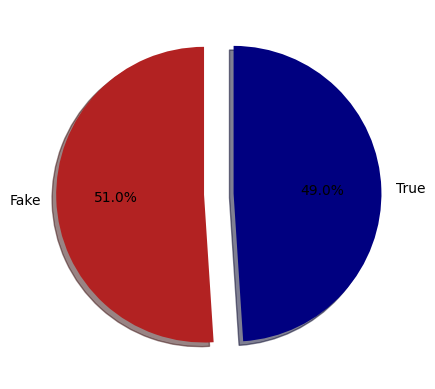

In [12]:
# 90 true, 10 fake, 70, 30
# 40, 60 good, 55, 45 is good
# Checking if our df is well balanced
label_size = [df['label'].sum(),len(df['label'])-df['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

## Creating a pytorch dataset

In [13]:
# transformers library allows you to use pytorch or tensorflow to save your dataset
# pytorch dataset looks like a dictoinary
# using this rep works well with the transformers library

# Create a pytorch dataset to ensure consistency in our data handling

# Create a train and eval datasets using the specified columns from the DataFrame
train_dataset = Dataset.from_pandas(train[['Unnamed: 0', 'title', 'text', 'label']]) # To create a structured representation of trained dataset that will be fed into my model
eval_dataset = Dataset.from_pandas(eval[['Unnamed: 0', 'title', 'text', 'label']]) # To create a structured representation of trained dataset that will be fed into my model
train_dataset

Dataset({
    features: ['Unnamed: 0', 'title', 'text', 'label', '__index_level_0__'],
    num_rows: 57229
})

In [14]:
eval_dataset

Dataset({
    features: ['Unnamed: 0', 'title', 'text', 'label', '__index_level_0__'],
    num_rows: 14308
})

In [15]:
# Combine the train and eval datasets into a DatasetDict and remove the index level column
dataset = DatasetDict({'train': train_dataset, 'eval': eval_dataset}) # Combine the train and eval datasets

dataset = dataset.remove_columns('__index_level_0__') #To Remove the '__index_level_0__' column from the dataset created for a structured dataset above
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'label'],
        num_rows: 57229
    })
    eval: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'label'],
        num_rows: 14308
    })
})

## Preprocessing and tokenization

In [16]:
# define helper functions

# funtion to replace usernames and links with placeholders.
def preprocess(text):
  # "@user my name is john"
  # "http my name is john"
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# no need for encoding: Fake=1, True=0 bcuz the target variable called label is already encoded

In [17]:
# Define the apply_preprocess function
def apply_preprocess(dataset, column='text'):
    return dataset.map(lambda example: {column: preprocess(example[column])},
                       remove_columns=[column])

# Apply the preprocess function to the 'text' column in both 'train' and 'eval' datasets
dataset['train'] = apply_preprocess(dataset['train'])
dataset['eval'] = apply_preprocess(dataset['eval'])
dataset

Map:   0%|          | 0/57229 [00:00<?, ? examples/s]

Map:   0%|          | 0/14308 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'label'],
        num_rows: 57229
    })
    eval: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'label'],
        num_rows: 14308
    })
})

###Tokenization

Text(0, 0.5, 'Number of texts')

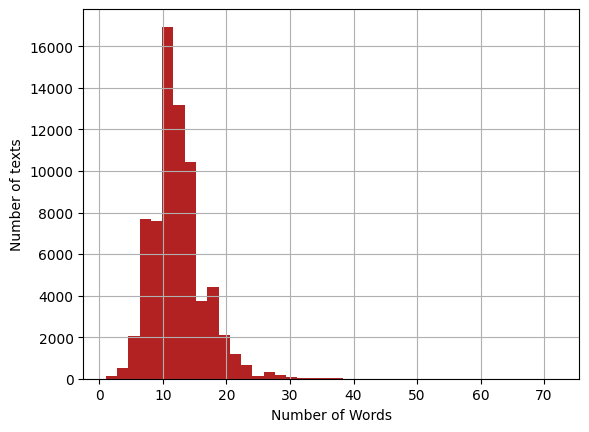

In [18]:
# Plot histogram of the number of words in train data 'text'
seq_len = [len(text.split()) for text in df['title']]

pd.Series(seq_len).hist(bins = 40,color='firebrick')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

Text(0, 0.5, 'Number of texts')

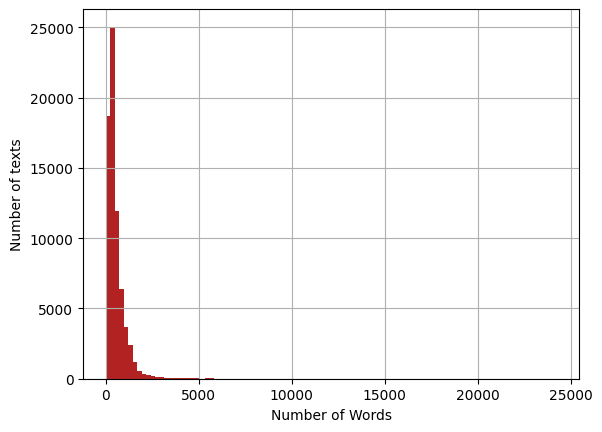

In [19]:
# Plot histogram of the number of words in train data 'text'
seq_len = [len(text.split()) for text in df['text']]

pd.Series(seq_len).hist(bins = 100,color='firebrick')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [20]:
# define the tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

def tokenize_data(example):
    return tokenizer(example['text'], padding='max_length', # compress all sentences to maximum of 30 words which is the max_length
                     truncation=True, # cut the sentence to 30_words
                     max_length=30 # increasing the max length doesn't guarantee a better score
                     )

# Change the tweets to tokens that the models can exploit
dataset = dataset.map(tokenize_data, batched=True)

# Transform	labels and remove the useless columns or columns that are not tokenized
remove_columns = ['Unnamed: 0', 'title', 'text']
dataset = dataset.map(remove_columns=remove_columns)
dataset

Map:   0%|          | 0/57229 [00:00<?, ? examples/s]

Map:   0%|          | 0/14308 [00:00<?, ? examples/s]

Map:   0%|          | 0/57229 [00:00<?, ? examples/s]

Map:   0%|          | 0/14308 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 57229
    })
    eval: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 14308
    })
})

## Trianing

In [21]:
# Loading a pretrain model for fine-tuning
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initi

In [22]:
# Configure the trianing parameters like `num_train_epochs`:
# the number of time the model will repeat the training loop over the dataset
training_args = TrainingArguments("test_trainer",
                                  num_train_epochs=3, # epoch is how many times you repeat training
                                  load_best_model_at_end=True,
                                  save_strategy='epoch',
                                  evaluation_strategy='epoch',
                                  logging_strategy='epoch',
                                  per_device_train_batch_size=32, # smaller batches take longer to train
                                  )

In [23]:
# set up the optimizer with the PyTorch implementation of AdamW
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5) # I specified the optimizer to avoid a warning message

In [24]:
train_dataset = dataset['train'].shuffle(seed=24)
eval_dataset = dataset['eval'].shuffle(seed=24) # scatter the dataset 24 times randomly

In [25]:
def compute_metrics(eval_pred):  # specify the evaluation metric
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='weighted')
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    return {
        "accuracy": accuracy,
        "f1-score": f1,
        "precision": precision,
        "recall": recall
    }

## Creating Trainer class from the Hugging Face transformers library

In [26]:
# Creating Trainer instance from transfomer library that can provide high-level interface for training and evaluation
trainer = Trainer(
    model,
    training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [27]:
trainer.train()  # rmse 0 to 1 closer to 0 means better performance.

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1-score,Precision,Recall
1,0.143700,0.096059,0.961490,0.961494,0.961586,0.961490
2,0.060200,0.109090,0.967291,0.967290,0.967292,0.967291
3,0.017700,0.159084,0.968968,0.968969,0.968972,0.968968


TrainOutput(global_step=5367, training_loss=0.073858312283767, metrics={'train_runtime': 1167.7801, 'train_samples_per_second': 147.02, 'train_steps_per_second': 4.596, 'total_flos': 2646840689155800.0, 'train_loss': 0.073858312283767, 'epoch': 3.0})

Don't worry the above issue, it is a `KeyboardInterrupt` that means I stopped the training to avoid taking a long time to finish.

In [28]:
# Launch the final evaluation
trainer.evaluate()  # eval loss is the performance cost of finetuning (0 to 1) 0.5 and above is not suitable.

{'eval_loss': 0.09605850279331207,
 'eval_accuracy': 0.9614900754822477,
 'eval_f1-score': 0.9614937072965413,
 'eval_precision': 0.9615857238711144,
 'eval_recall': 0.9614900754822477,
 'eval_runtime': 36.1852,
 'eval_samples_per_second': 395.411,
 'eval_steps_per_second': 49.44,
 'epoch': 3.0}

## Pushing to HuggingFace
Some checkpoints of the model are automatically saved locally in `test_trainer/` during the training.

You may also upload the model on the Hugging Face Platform... [Read more](https://huggingface.co/docs/hub/models-uploading)

In [29]:
huggingface_hub.notebook_login()
# login to the Hugging Face Hub with your token

In [30]:
# # Push model and tokenizer to HugginFace
# model.push_to_hub("") # (username/model_name)
# tokenizer.push_to_hub("")